# Discretización temporal no uniforme: El ejemplo del problema restringido de los tres cuerpos

<ul id="top">
<li><a href="#1-Problema-restringido-de-los-tres-cuerpos">1-Problema restringido de los tres cuerpos</a></li>
<li><a href="#2-Implementación-RK5-y-DOPRI5">2-Implementación RK5 y DOPRI5</a></li>
<li><a href="#3-Simulaciones">3-Simulaciones</a></li>
<li><a href="#Valoración">Valoración</a></li>
</ul>  

In [1]:
using Plots
using LinearAlgebra

## 1-Problema restringido de los tres cuerpos

En este ejercicio, simularemos numéricamente la evolución de un pequeño vehículo espacial moviéndose bajo el influjo gravitacional de la tierra y la luna, en el mismo plano que el de la órbita lunar. El efecto del sol y del resto de los planetas no se tiene en cuenta en este modelo, y se considera que la luna describe una órbita circular alrededor del origen de coordenadas (que es el centro de masas del conjunto de la tierra y la luna).  En el modelo matemático que consideraremos, las coordenadas $(x,y)$ del vehículo espacial obedecen el siguiente sistema de ecuaciones diferenciales de segundo orden:

\begin{eqnarray*}
  \frac{d^2}{dt^2} x &=& -(1-\mu) \, \frac{x+ \mu \cos(t)}{r_1^3}  - \mu\,  \frac{x- (1-\mu)\cos(t)}{r_2^3} \\
  \frac{d^2}{dt^2} y &=& -(1-\mu) \, \frac{y+ \mu \sin(t)}{r_1^3}  - \mu\,  \frac{y- (1-\mu)\sin(t)}{r_2^3},
\end{eqnarray*}

donde 
\begin{eqnarray*}
  r_1 &=& \sqrt{(x+\mu\, \cos(t))^2+(y+\mu \, \sin(t))^2}, \\ 
r_2 &=& \sqrt{(x-(1-\mu)\,  \cos(t))^2+(y-(1-\mu)\,  \sin(t))^2}, 
\end{eqnarray*}
y $\mu = 0.012277471$.

Dicho sistema de EDOs de segundo orden se puede reescribir como un sistema de EDOs de primer orden añadiendo las variables de estado $(v,w)$ correspondientes a las dos componentes de la velocidad del vehículo espacial:

<a id='Edo-PRTC'></a>
\begin{equation*}
\begin{array}{rcl}
\displaystyle \frac{d}{dt} x &=& v, \\ 
\displaystyle\frac{d}{dt} y &=&  w,  \\ 
\displaystyle  \frac{d}{dt} v &=& \displaystyle -(1-\mu) \, \frac{x+ \mu \cos(t)}{r_1^3}  - \mu\,  \frac{x- (1-\mu)\cos(t)}{r_2^3} \\
\displaystyle  \frac{d}{dt} w &=& \displaystyle -(1-\mu) \, \frac{y+ \mu \sin(t)}{r_1^3}  - \mu\,  \frac{y- (1-\mu)\sin(t)}{r_2^3}.
  \end{array}
  \hspace{3em} \tag{1}
\end{equation*}

A lo largo del presente ejercicio, consideraremos las siguientes condiciones iniciales:

<a id='Cond-Ini'></a>
\begin{equation*}
  x(0)=0.994, \quad y(0)=0, \quad v(0)=0, \quad w(0)=-1.0075851063790825. 
    \hspace{3em} \tag{2}
\end{equation*}

Dicha condiciones iniciales se corresponden al caso en que el vehículo espacial sale de la superficie de la luna a gran velocidad, y vuelve al mismo punto de la superficie de la luna después de orbitar alrededor de la tierra durante un tiempo $T=17.06521656015796$. Las unidades de longitud y tiempo son tales que la distancia entre la tierra y la luna es $1$ en dichas unidades, y el tiempo que transcurre durante una revolución de la luna alrededor de la tierra es $2\pi$. 

Las coordenadas del centro de la luna en cada instante $t$ son $((1-\mu)\, \cos(t), (1-\mu)\, \sin(t))$ (mientras que los de la tierra son  $(-\mu \, \cos(t), -\mu\, \sin(t))$). En particular, en $t=0$, la luna está situada en el punto $(1-\mu,0)=(0.987723,0)$, mientras que la tierra estará en $(-\mu,0)=(-0.012277471,0)$, de modo que inicialmente, el vehículo espacial está alineado con la luna y la tierra, y muy cerca de la luna, a una distancia de $0.994 - 0.987723=0.006277471$.

Resulta que pasado un cierto tiempo $T$, en concreto, $T=17.06521656015796$, el vehículo espacial vuelve a estar alineado con la luna y la tierra. Ello se traduce en que 

<a id='Cond-T'></a>
\begin{equation*}
  x(T) \, \sin(T) - y(T)\, \cos(T)=0. \hspace{8em} (3)
\end{equation*}

(Además, después de ese tiempo vuelve a estar exactamente a la misma distancia de la luna que en el tiempo $t=0$.) 

<a href="#top">Back to the top</a>

## 2-Implementación RK5 y DOPRI5 

### 2.1- Ejercicio

En este ejercicio, haremos uso del método de Runge-Kutta de orden 5 de Dormand y Prince presentado en la exposición de la 2ª parte del Tema 2.  Utilizaremos dos versiones de dicho método: 

1. El método implementado para una discretización temporal uniforme, que implementaremos como una función llamada RK5, con los mismos argumentos de entrada y salida que la función RK4 implementada en la cuarta semana.
2. El método implementado con discretización temporal no uniforme. Para ello implementaréis una función, que llamaremos DOPRI5, siguiendo las indicaciones del documento _Algoritmo de Runge-Kutta con paso variable_ disponible en el Tema 3 del aula virtual.  Los argumentos de entrada son los siguientes:  $u_0, t_0, T, f, p, tol, h_0, n_{\mathrm{max}}$.
El significado de los cinco primeros argumentos de entrada es el mismo que en RK4. Como argumentos de entrada adicionales, por un lado tenemos el entero positivo $n_{\mathrm{max}}$, que es el número máximo de pasos del método de Runge-Kutta que vamos a dar, y por otro lado, tenemos los números reales positivos tol y $h_0$:
tol es el parámetro de control de error descrito en el algoritmo, y $h_0$ es la longitud de paso inicial. El resultado de la función DOPRI5 será una tabla de resultados como la de RK4.
En la primera columna de dicha tabla de resultados estarán los valores del tiempo $t_j$ de la discretización temporal no uniforme generada internamente por el algoritmo.

Tanto para la implementación de la función RK5 como para la de DOPRI5, haremos uso por un lado, de la siguiente función, que devuelve todos los valores de los coefficientes del método de Runge-Kutta:

In [2]:
function DOPRI5Coefs()
    a = zeros(6,6)
    a[2,1] = 1/5
    a[3,1] = 3/40
    a[3,2] = 9/40
    a[4,1] = 44/45
    a[4,2] = -56/15
    a[4,3] = 32/9
    a[5,1] = 19372/6561
    a[5,2] = -25360/2187
    a[5,3] = 64448/6561
    a[5,4] = -212/729
    a[6,1] = 9017/3168
    a[6,2] = -355/33
    a[6,3] = 46732/5247
    a[6,4] = 49/176
    a[6,5] = -5103/18656
    b = [35/384, 0., 500/1113, 125/192, -2187/6784, 11/84]  
    c = [0., 0.2, 0.3, 0.8, 8/9, 1.]
    d = [-12715105075/11282082432,  0., 87487479700/32700410799, -10690763975/1880347072, 
           701980252875/199316789632, -1453857185/822651844,  69997945/29380423]
    return a, b, c, d
end

DOPRI5Coefs (generic function with 1 method)

- **Implementar la función RK5(u0, t0, T, n, f, p, m).**

In [3]:
"""
Metodo de Runge-Kutta de orden 5 de Dormand y Prince (1981). 
Implementación con paso constante.
"""
function  RK5(u0, t0, T, n, f, p, m=1)
      h = (T-t0)/(n*m)
     (a,b,c,d) = DOPRI5Coefs() # Coeficientes del método
      W = zeros(n+1,length(u0)+1)
      W[1,:] = [t0; u0]  
      tj = t0
      uj = u0
    for j in 1:n
        for i in 1:m
          uj = RK5Step(uj,tj,h,f,p,a,b,c)    
          tj = tj + h
        end
        W[j+1,:] = [tj; uj] # Se introduce el resultado del paso j-ésimo 
                            # en la fila (j+1)-ésima de la matriz de resultados
    end
    return W
  end



function RK5Step(uj,tj,h,f,p,a,b,c)    
    k1 = h* f(tj, uj, p)
    k2 = h * f(tj+c[2]*h, uj+a[2,1]*k1, p)
    k3 = h * f(tj+c[3]*h, uj+a[3,1]*k1+a[3,2]*k2, p)
    k4 = h * f(tj+c[4]*h, uj+a[4,1]*k1+a[4,2]*k2+a[4,3]*k3, p)
    k5 = h * f(tj+c[5]*h, uj+a[5,1]*k1+a[5,2]*k2+a[5,3]*k3+a[5,4]*k4, p)
    k6 = h * f(tj+c[6]*h, uj+a[6,1]*k1+a[6,2]*k2+a[6,3]*k3+a[6,4]*k4+a[6,5]*k5, p)
    return uj + b[1]*k1+b[3]*k3+b[4]*k4+b[5]*k5+b[6]*k6
end

RK5Step (generic function with 1 method)

- **Implementar la función DOPRI5(u0, t0, T, f, p, tol, h0, nmax).**

In [4]:
"""
Metodo de Runge-Kutta de orden 5 de Dormand y Prince (1981). 
Implementación con paso variable.
"""
function  DOPRI5(u0, t0, T, f, p, tol, h0, nmax=10000)
      d = length(u0)  
     (a,b,c,d) = DOPRI5Coefs() # Coeficientes del método
      W = zeros(nmax+1,length(u0)+1)
      W[1,:] = [t0; u0]  
      tj = t0
      uj = u0
      hj = h0
      j = 1
      for i = 1:nmax
          (uj1, tj1, Eh) = DOPRI5Step(uj,tj,hj,f,p,a,b,c,d) 
          if (Eh >= 2*tol) 
              hj = hj*(tol/Eh)^0.2  # Paso fallido: se recalcula hj
          elseif tj1==T
              n = j+1
              W[n,:] = [tj1; uj1]
            return i,W[1:n,:]
          else
              tj = tj1
              uj = uj1
              W[j+1,:] = [tj; uj]
              j += 1
              hj = min(hj*(tol/Eh)^0.2, T-tj)
         end
      end
       return nmax,W  # En este caso, no se ha llegado al final del intervalo temporal, 
                     # por haberse alcanzado el número máximo de pasos (fallidos y exitosos) totales
  end

function DOPRI5Step(uj,tj,h,f,p,a,b,c,d)    
    k1 = h* f(tj, uj, p)
    k2 = h * f(tj+c[2]*h, uj+a[2,1]*k1, p)
    k3 = h * f(tj+c[3]*h, uj+a[3,1]*k1+a[3,2]*k2, p)
    k4 = h * f(tj+c[4]*h, uj+a[4,1]*k1+a[4,2]*k2+a[4,3]*k3, p)
    k5 = h * f(tj+c[5]*h, uj+a[5,1]*k1+a[5,2]*k2+a[5,3]*k3+a[5,4]*k4, p)
    k6 = h * f(tj+c[6]*h, uj+a[6,1]*k1+a[6,2]*k2+a[6,3]*k3+a[6,4]*k4+a[6,5]*k5, p)
    uj1 = uj + b[1]*k1+b[3]*k3+b[4]*k4+b[5]*k5+b[6]*k6
    tj1 = tj + h
    k7 = h * f(tj1, uj1, p)
    Eh = norm(d[1]*k1+d[3]*k3+d[4]*k4+d[5]*k5+d[6]*k6+d[7]*k7)
    return uj1, tj1, Eh
end

DOPRI5Step (generic function with 1 method)

<a href="#top">Back to the top</a>

## Simulaciones

### 2.2- Ejercicio

Utilizaréis ambos versiones del método de orden 5 de Dormand y Prince para simular la evolución de las coordenadas $(x(t),y(t))$ de posición (y la velocidad $(v(t),w(t))$) del vehículo espacial en el intervalo temporal $t \in [0,T]$ (donde $T=17.06521656015796$). 
Los resultados numéricos que obtengamos, al ser aproximaciones a la solución, no satisfarán exactamente la igualdad [(3)](#Cond-T). Para comparar la precisión de unos resultados con otros, comprobaréis en qué medida se satisface dicha igualdad [(3)](#Cond-T).


- **Aplicar el método RK5 al problema [(1)](#Edo-PRTC)-[(2)](#Cond-Ini), para calcular aproximaciones de la solución $u(t)=(x(t),y(t),v(t),w(t))$ para los valores de $t$ siguiente
\begin{equation*}
t_0=0, \ t_1=t_0+h, \ t_2 = t_1+h, \ \ldots, t_{n-1}=t_{n-2}+h, \ t_{n}=t_{n-1}+h=T,
\end{equation*}
 donde $h=T/n$ con $n=20000$. **
 
 

In [5]:
f_RTB = function(t,u,mu)
  x  = u[1]
  y  = u[2]
  v  = u[3]
  w  = u[4]
  umu=1-mu;
  X= cos(t);
  Y = sin(t);
  r1 = sqrt((x+mu * X)^2+(y+ mu * Y)^2);
  r2 = sqrt((x-umu * X)^2+(y- umu * Y)^2);
  D1 = 1/r1^3;
  D2 = 1/r2^3;
  return [v,w,-umu * (x+ mu * X)* D1 - mu * (x- umu * X) * D2, -umu * (y+mu * Y) * D1 - mu * (y-umu * Y) * D2]
end

μ = 0.012277471
u0 = [0.994, 0., 0., -1.0075851063790825]

f_RTB(0,u0,μ)

4-element Array{Float64,1}:
    0.0               
   -1.0075851063790826
 -312.5338532761245   
   -0.0               

In [6]:
T = 17.06521656015796
n = 20000
res = RK5(u0,0.,T,n,f_RTB,μ)
res[end,:]
res

20001×5 Array{Float64,2}:
  0.0           0.994      0.0           0.0       -1.00759  
  0.000853261   0.993888  -0.000849666  -0.260305  -0.972618 
  0.00170652    0.993566  -0.00164301   -0.486757  -0.879134 
  0.00255978    0.993072  -0.00234052   -0.662083  -0.752463 
  0.00341304    0.99245   -0.00292454   -0.786798  -0.616428 
  0.0042663     0.991741  -0.00339412   -0.870493  -0.485937 
  0.00511956    0.990973  -0.00375734   -0.924221  -0.367728 
  0.00597283    0.990169  -0.00402567   -0.957162  -0.263574 
  0.00682609    0.989344  -0.00421096   -0.976029  -0.172868 
  0.00767935    0.988506  -0.00432407   -0.985455  -0.0941077
  0.00853261    0.987664  -0.00437448   -0.988571  -0.0256024
  0.00938587    0.986821  -0.00437023   -0.987481   0.0342292
  0.0102391     0.985979  -0.00431814   -0.983598   0.0867618
  ⋮                                                          
 17.0558       -0.204862  -0.96533      -0.17587   -0.972441 
 17.0567       -0.205036  -0.966155     -0.2

> **Comprobación**
>
> Los valores de la posición $(x,y)$ y la velocidad $(v,w)$ del satélite en  $t = T$ obtenidas por RK5 con $h=T/20000$  son respectivamente
>
> $(x, y) = (-0.2106569017750179, -0.9714189248994205)$, 
>
> $(v,w) = (-0.9848940608011202, \ 0.21446613403369472)$.

- **Dibujar en una misma figura la órbita descrita por las coordenadas $(x,y)$ de posición del vehículo espacial   junto con la órbita descrita por la luna (recordemos que hemos supuesto que la evolución de las coordenadas de posición de la luna viene dada por  $((1-\mu)\, \cos(t), (1-\mu)\, \sin(t))$.)**

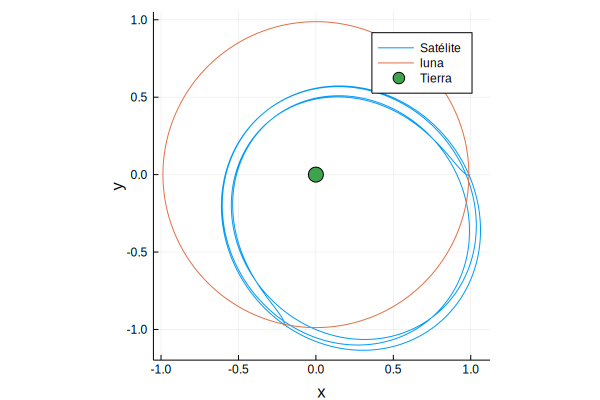

In [7]:
tt = res[:,1]
xsat = res[:,2]
ysat = res[:,3]
cc = cos.(tt)
ss = sin.(tt)
xluna = (1-μ)*cc
yluna = (1-μ)*ss

plot(xsat,ysat, xlabel="x", ylabel="y",label="Satélite", aspect_ratio=1)
plot!(xluna,yluna, label="luna")
plot!([0.],[0.],line=0,marker=8, label="Tierra")

### 2.3- Ejercicio

- **Para comprobar el nivel de precisión de la aproximación de la solución obtenida, calcular la expresión del lado izquierdo de la igualdad [(3)](#Cond-T).**

In [8]:
xsat[end]*sin(T) - ysat[end]*cos(T)

5.310373847627892e-6

- **¿Qué nos dice esto de la precisión de los resultados obtenidos?**
>
> **Respuesta**
> 
> Si los resultados fueran exactos, según el enunciado, nos tendría que dar 0. El valor que obtenemos, aunque bastante pequeño, no parece causado por errores de redondeo, sino por el error del método RK5. Es de esperar que la precisión de los resultados se pueda mejorar utilizando una longitud de paso más pequeña que la utilizada.

### 2.4- Ejercicio

- **Repetir los apartados 2.2 y 2.3, pero aplicando el método DOPRI5 con tolerancia $\mathrm{tol}=10^{-6}$ y $h_0=0.1$.**

In [9]:
tol = 1.e-6
h0 = 0.1
i,res = DOPRI5(u0,0.,T,f_RTB,μ,tol,h0)
println("Numero de pasos: ",i)
res

Numero de pasos: 754


752×5 Array{Float64,2}:
  0.0           0.994      0.0           0.0        -1.00759  
  0.000168752   0.993996  -0.000169952  -0.0526898  -1.00618  
  0.00032029    0.993984  -0.000322179  -0.0997553  -1.00253  
  0.000468731   0.993966  -0.000470596  -0.145415   -0.996807 
  0.00061681    0.993941  -0.000617653  -0.190332   -0.989047 
  0.000765194   0.993909  -0.000763712  -0.234528   -0.979298 
  0.000914154   0.993871  -0.000908742  -0.277909   -0.967626 
  0.0010639     0.993826  -0.00105265   -0.320372   -0.954109 
  0.00121464    0.993775  -0.00119534   -0.361818   -0.938832 
  0.00136659    0.993717  -0.00133673   -0.402164   -0.921882 
  0.00151999    0.993652  -0.00147674   -0.441337   -0.903352 
  0.00167508    0.993581  -0.00161531   -0.479276   -0.883334 
  0.00183214    0.993503  -0.00175237   -0.515929   -0.86192  
  ⋮                                                           
 17.0636       -0.209074  -0.97138      -0.971873   -0.256814 
 17.0638       -0.20923   -0.97

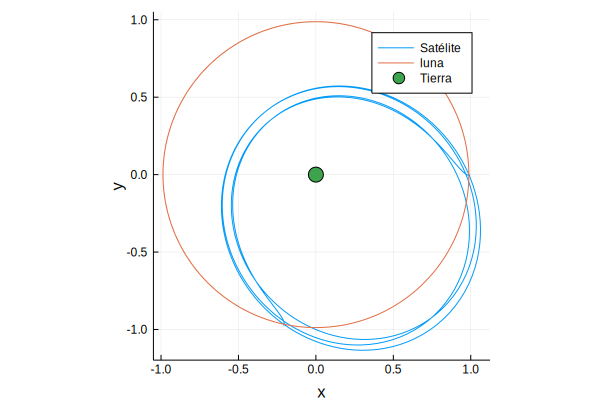

In [10]:
tt = res[:,1]
xx = res[:,2]
yy = res[:,3]
cc = cos.(tt)
ss = sin.(tt)
XX = (1-μ)*cc
YY = (1-μ)*ss

plot(xx,yy, xlabel="x", ylabel="y",label="Satélite", aspect_ratio=1)
plot!(XX,YY, label="luna")
plot!([0.],[0.],line=0,marker=8, label="Tierra")

In [11]:
xx[end]*sin(T) - yy[end]*cos(T)

1.6570371325075328e-8

>**Comprobación**
>
> La expresión del lado izquierdo de la igualdad [(3)](#Cond-T) para la posición $(x,y)$ del satélite en $t=T$ obtenida con DOPRI5 debería de dar como resultado 1.6570371325075328e-8

- **¿Cual de los dos métodos da resultados más precisos? (Supondremos que el nivel de precisión en cada caso se puede deducir comprobando hasta que punto se verifica la igualdad [(3)](#Cond-T))**.

>**Respuesta**
>
>_Con DOPRI5 se ha obtenido una mayor precisión que con RK5._

### 2.5- Ejercicio

- **Comparar la eficiencia del algoritmo RK5 (método de Runge-Kutta de Dormand y Prince de orden 5 con discretización temporal uniforme) y del algoritmo DOPRI5 (mismo método de Runge-Kutta pero con discretización temporal no uniforme).
¿Ha merecido la pena (desde el punto de vista la eficiencia de los cálculos) en este caso el empleo de una discretización temporal no uniforme?**

>**Respuesta**
>
>_Con la implementación de paso variable (DOPR5), se ha obtenido una mayor precisión con un número de pasos mucho menor (754 frente a 20000 con el algoritmo RK5), de modo que ha resultado cláramente más eficiente._

### 2.6- Ejercicio

- **Repetir los cálculos realizados previamente con DOPRI5, pero aplicando el DOPRI5 con tolerancia $\mathrm{tol}=10^{-7}$ (y $h_0=0.1$). (En particular, comprobar hasta que punto se verifica la igualdad [(3)](#Cond-T)) para los valores de la posición $(x,y)$ en $t=T$ obtenidos.)**

In [12]:
tol = 1.e-7
h0 = 0.1
i,res = DOPRI5(u0,0.,T,f_RTB,μ,tol,h0)
println("Numero de pasos: ",i)

Numero de pasos: 1339


In [13]:
tt = res[:,1]
xx = res[:,2]
yy = res[:,3]
xx[end]*sin(T) - yy[end]*cos(T)

1.7339129299021039e-9

- **Se podría decir que el error cometido es, _a grosso modo_,  proporcional a tol?**

>**Respuesta**
>
>_Si. Al disminuír la tolerancia por 10, se ha disminuído el error aproximadamente por 10._

<a href="#top">Back to the top</a>

### Valoración

_Incluir aquí los comentarios de valoración de la tarea a entregar (dificultad, interés, etc, incluidas, si se quiere, sugerencias de mejora del ejercicio), así como una estimación del tiempo dedicado al trabajo de la semana (desglosado en el tiempo de estudio de material teórico, tiempo de dedicación a la participación activa o pasiva en los foros, tiempo de implementación y experimentación con los problemas prácticos planteados, y tiempo de preparación del documento jupyter final)._